In [1]:
from keras.layers import Dense              # keras help to use tensorflow easier
from keras.models import Sequential
from keras.optimizers import SGD
import keras.utils
from matplotlib import pyplot as plt
%matplotlib inline
from keras.datasets import mnist
import numpy as np


C:\Users\dolla\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


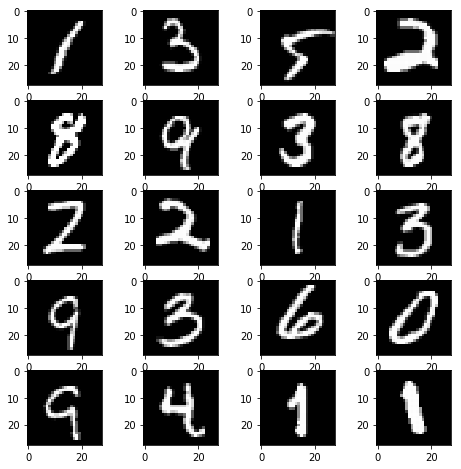

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

index = np.random.choice(x_train.shape[0], 21, replace=False)
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns * rows + 1):
    img = x_train[index[i]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [4]:
x_train = x_train.reshape(60000, 784)       # flatten dataset to line 784d
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')         # convert data to float
x_test = x_test.astype('float32')

x_train /= 255                              # normalize dataset
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
# Dense = node

model = Sequential()                                          # empty model
model.add(Dense(256, activation='relu', input_shape=(784,)))  # 28 * 28 = 784
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))                    # adjust sum of prob in each to 1


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [6]:
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])    # loss function = categorical_crossentropy

In [7]:
model.fit(x_train, y_train,
          batch_size=batch_size,                         # ability of graphic card
          epochs=epochs,                                 # round for calculate and feed
          validation_data=(x_test, y_test),
          validation_split=0.2)                          # split dataset 20% to validate


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 1.2042 - acc: 0.6819 - val_loss: 0.5282 - val_acc: 0.8616
Epoch 2/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.4376 - acc: 0.8792 - val_loss: 0.3605 - val_acc: 0.8991
Epoch 3/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.3418 - acc: 0.9027 - val_loss: 0.3054 - val_acc: 0.9136
Epoch 4/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.3000 - acc: 0.9138 - val_loss: 0.2726 - val_acc: 0.9225
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2719 - acc: 0.9213 - val_loss: 0.2558 - val_acc: 0.9269
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.2509 - acc: 0.9272 - val_loss: 0.2343 - val_acc: 0.9314
Epoch 7/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2334 - acc: 0.9325 - val_loss: 0.2207 - val_ac

In [8]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1259589623630047
Test accuracy: 0.9618
